<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/yanolja_eeve_korean_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U transformers peft accelerate optimum
!pip install --quiet bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 9.8 MB/s eta 0:00:00


In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("yanolja/EEVE-Korean-Instruct-2.8B-v1.0", trust_remote_code=True).cuda()
tokenizer = AutoTokenizer.from_pretrained("yanolja/EEVE-Korean-Instruct-2.8B-v1.0", trust_remote_code=True)

prompt_template = """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
Human: {prompt}
Assistant:
"""

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

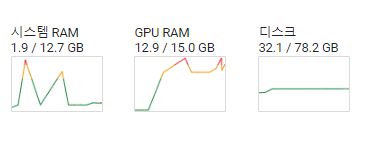

## 4bit BnB

In [2]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM
from transformers import BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
load_in_4bit=True,
bnb_4bit_use_double_quant=True,
bnb_4bit_quant_type="nf4",
bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained("yanolja/EEVE-Korean-Instruct-10.8B-v1.0", trust_remote_code=True, device_map="auto", quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained("yanolja/EEVE-Korean-Instruct-10.8B-v1.0", trust_remote_code=True)

prompt_template = """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
Human: {prompt}
Assistant:
"""

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.18M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [2]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(40960, 4096)
    (layers): ModuleList(
      (0-47): 48 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRM

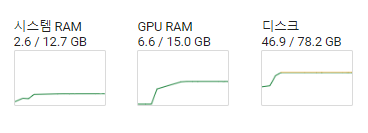

In [3]:
from transformers import TextStreamer

streamer = TextStreamer(tokenizer)

In [4]:
text = '가면 라이더에 대해서 알려주세요.'

model_inputs = tokenizer(prompt_template.format(prompt=text), return_tensors='pt').to("cuda")

outputs = model.generate(**model_inputs,streamer=streamer, max_new_tokens=256)
output_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

print(output_text)

Setting `pad_token_id` to `eos_token_id`:32000 for open-end generation.


<s> A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
Human: 가면 라이더에 대해서 알려주세요.
Assistant:
가면 라이더, 또는 쿠우가카 라이더(仮面ライダー)는 1971년 1월 27일부터 1972년 1월 26일까지 방영된 일본의 텔레비전 시리즈로, 히로시 이시이(Hiroshi Ishii)가 창작하고 토에이(Toei)가 제작했습니다. 가면 라이더는 슈퍼히어로 장르의 선구적인 작품으로, 이후 수많은 슈퍼히어로 텔레비전 시리즈와 영화에 영향을 미쳤습니다.

가면 라이더의 이야기는 젊은 고등학생인 도우미 타이스케(Taito Tajima)가 끔찍한 사고로 인해 부상을 입고, 의문의 인물인 켄지(Kenji)에게 구출됩니다. 켄지는 도우미에게 가면 라이더라는 슈퍼히어로로 변신할 수 있는 특별한 가면과 의상을 제공합니다. 가면 라이더로 변신한 도우미는 악당들과 싸우고, 정의와 평화를 지키며, 도시를 보호합니다.

가면 라이더는 독특
A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
Human: 가면 라이더에 대해서 알려주세요.
Assistant:
가면 라이더, 또는 쿠우가카 라이더(仮面ライダー)는 1971년 1월 27일부터 1972년 1월 26일까지 방영된 일본의 텔레비전 시리즈로, 히로시 이시이(Hiroshi Ishii)가 창작하고 토에이(Toei)가 제작했습니다. 가면 라이더는 슈퍼히어로 장르의 선구적인 작품으로, 이후 수많은 슈퍼히어로 텔레비전 시리즈와 영화에 영향을 미쳤습니다.

가면 라이더의 이야기는 젊은

In [5]:
text = """
할루시네이션 테스트

유희왕 카드 퀴즈
```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과
```
이 카드는 자신 턴 / 상대 턴 상관없이 패에서 효과를 발동해서 상대를 견제할 수 있는 패트랩입니다.
덱에서 카드를 패에 넣거나, 묘지로 보내거나, 몬스터를 특수 소환하는 효과를 무효화할 수 있습니다.
이 카드의 텍스트에서 가장 주의해야 하는 부분은 이하의 어느 효과를 포함하는의 서술입니다.
텍스트 어딘가에 저 세 가지 효과 가운데 하나라도 포함이 되었다면 무효화가 가능하다는 뜻입니다.

Q1. 상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화 수 있을까요?

```
개기일식의 서
속공 마법
①: 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 한다. 이 턴의 엔드 페이즈에, 상대 필드의 뒷면 수비 표시 몬스터를 전부 앞면 수비 표시로 하고, 그 후, 이 효과로 앞면 수비 표시로 한 몬스터의 수만큼 상대는 덱에서 드로우한다.
```

Q1의 정답:"""

model_inputs = tokenizer(prompt_template.format(prompt=text), return_tensors='pt').to("cuda")

outputs = model.generate(**model_inputs, streamer=streamer, max_new_tokens=256)
output_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

print(output_text)

Setting `pad_token_id` to `eos_token_id`:32000 for open-end generation.


<s> A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions.
Human: 
할루시네이션 테스트

유희왕 카드 퀴즈
```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과
```
이 카드는 자신 턴 / 상대 턴 상관없이 패에서 효과를 발동해서 상대를 견제할 수 있는 패트랩입니다.
덱에서 카드를 패에 넣거나, 묘지로 보내거나, 몬스터를 특수 소환하는 효과를 무효화할 수 있습니다.
이 카드의 텍스트에서 가장 주의해야 하는 부분은 이하의 어느 효과를 포함하는의 서술입니다.
텍스트 어딘가에 저 세 가지 효과 가운데 하나라도 포함이 되었다면 무효화가 가능하다는 뜻입니다.

Q1. 상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화 수 있을까요?

```
개기일식의 서
속공 마법
①: 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 한다. 이 턴의 엔드 페이즈에, 상대 필드의 뒷면 수비 표시 몬스터를 전부 앞면 수비 표시로 하고, 그 후, 이 효과로 앞면 수비 표시로 한 몬스터의 수만큼 상대는 덱에서 드로우한다.
```

Q1의 정답:
Assistant:
Q1. 상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화할 수 있을까요?

답변: 네, 가능합니다. 개기일식의 서의 효과는 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 하는 것으로, 이는 덱에서 카드를